# Importing the Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

# Loading the Cleaned Dataset

In [3]:
df = pd.read_csv("Cleaned_Attrition_CSV")

In [5]:
df.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Holiday_taken,Overtime_Working,Age,Attrition,...,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3,4,2,17,No,51,No,...,Healthcare Representative,Married,131160,1,11,0,1,1,0,0
1,2,2,4,3,2,4,13,No,31,Yes,...,Research Scientist,Single,41890,0,23,1,6,5,1,4
2,3,3,3,2,2,1,7,No,32,No,...,Sales Executive,Married,193280,1,15,3,5,5,0,3
3,4,2,3,4,4,3,14,No,38,No,...,Human Resources,Married,83210,3,11,3,13,8,7,5
4,5,3,3,4,1,3,4,Yes,32,No,...,Sales Executive,Single,23420,4,12,2,9,6,0,4


In [6]:
#Drop the 'EmployeeID' column for seperate the dataset to numerical and categorical columns
df.drop(columns = ['EmployeeID'],inplace=True)
cat_col = df.select_dtypes(include='O').columns
num_col = df.select_dtypes(include='number').columns

In [7]:
cat_col

Index(['Overtime_Working', 'Attrition', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus'],
      dtype='object')

In [8]:
num_col

Index(['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'Holiday_taken', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
#Find the unique values of each categrical columns and iterate them with number of values

for i in cat_col:
    print("Unique Values of ", i,set(df[i]))
    print(df[i].value_counts())
    print('-'*60)

Unique Values of  Overtime_Working {'No', 'Yes'}
No     3087
Yes    1323
Name: Overtime_Working, dtype: int64
------------------------------------------------------------
Unique Values of  Attrition {'No', 'Yes'}
No     3699
Yes     711
Name: Attrition, dtype: int64
------------------------------------------------------------
Unique Values of  BusinessTravel {'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'}
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64
------------------------------------------------------------
Unique Values of  Department {'Sales', 'Research & Development', 'Human Resources'}
Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64
------------------------------------------------------------
Unique Values of  EducationField {'Medical', 'Human Resources', 'Technical Degree', 'Marketing', 'Life Sciences', 'Other'}
Life Sciences       

# Exploratory Data Analysis for Categorical Columns

## 1.Attrition Count

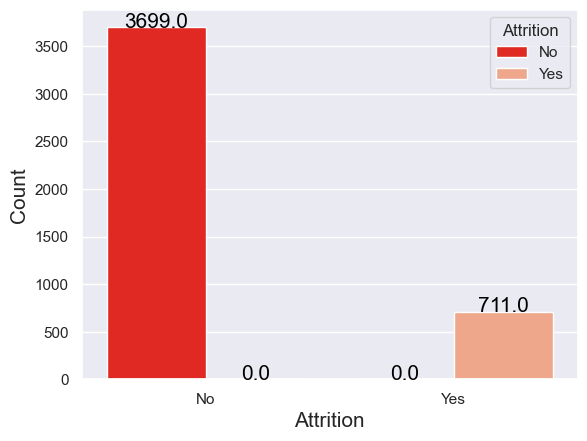

In [27]:
# Here we using count plot 
# Define the color palette
colors = ["#FF0B04", "#FFA07A"]

# Create the count plot
fig = sns.countplot(data=df,x=df.Attrition,orient='h',hue=df.Attrition, palette=colors)
plt.legend(title="Attrition")
#setting the font size for labels
fig.set_ylabel('Count', fontsize=15)
fig.set_xlabel('Attrition', fontsize=15)

for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2, height+0.1, height, ha="center",fontsize=15,color='black')
    


# 2.Attrition Count of Overtime Worked Employees

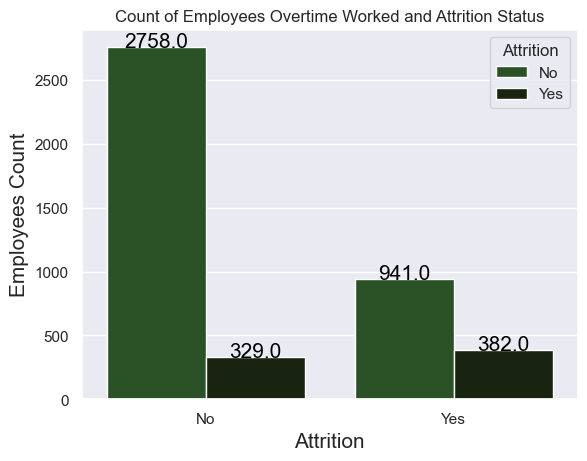

In [111]:
# Here we using count plot 
# Define the color palette
colors = ["#25581f", "#19270d"]

# Create the count plot
fig = sns.countplot(data=df,x=df.Overtime_Working,orient='h',hue=df.Attrition, palette=colors)
plt.legend(title="Attrition")
plt.title("Count of Employees Overtime Worked and Attrition Status")
#setting the font size for labels
fig.set_ylabel('Employees Count', fontsize=15)
fig.set_xlabel('Attrition', fontsize=15)

for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2., height+0.1, height, ha="center",fontsize=15,color='black')

# 3.Attrition Based on Business Travel

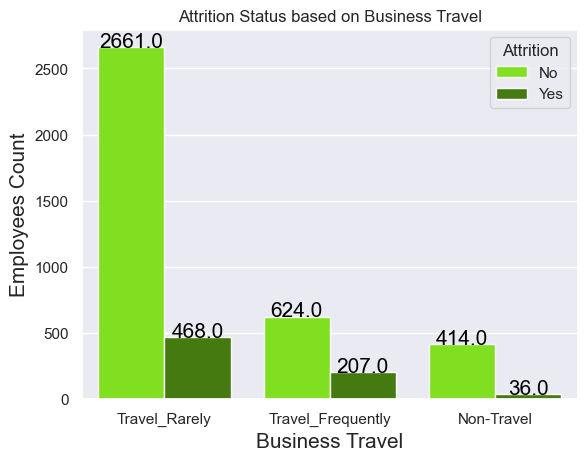

In [33]:
colors = ["#7FFF00", "#458B00"]
# Create the count plot
fig = sns.countplot(data=df,x=df.BusinessTravel,orient='h',hue=df.Attrition, palette=colors)
plt.legend(title="Attrition")
plt.title("Attrition Status based on Business Travel")
#setting the font size for labels
fig.set_ylabel('Employees Count', fontsize=15)
fig.set_xlabel('Business Travel', fontsize=15)

for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2., height+0.1, height, ha="center",fontsize=15,color='black')

# 4.Attrition Based on Department

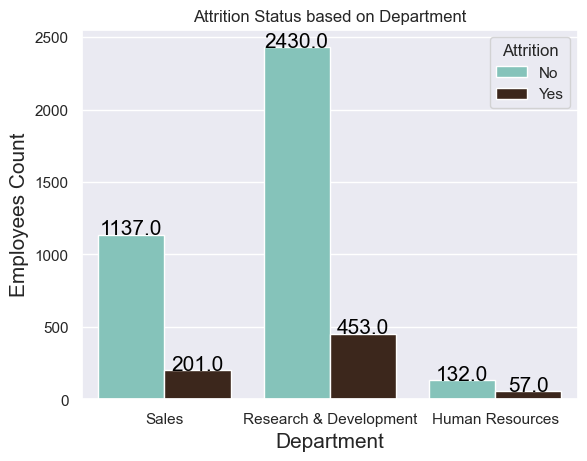

In [119]:
colors = ["#7acec2", "#412517"]
# Create the count plot
fig = sns.countplot(data=df,x=df.Department,orient='h',hue=df.Attrition, palette=colors)
plt.legend(title="Attrition")
plt.title("Attrition Status based on Department")
#setting the font size for labels
fig.set_ylabel('Employees Count', fontsize=15)
fig.set_xlabel('Department', fontsize=15)

for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2., height+0.1, height, ha="center",fontsize=15,color='black')

# 5.Attrition Count Based on Job Role

In [39]:
df1 = df.copy()

In [72]:
#Creating new Dataframe
val = df[df['Attrition']=='Yes']['JobRole'].value_counts()
job_df = pd.DataFrame(val)
job_df=job_df.rename(columns={'JobRole':"Attrition_Count"})

Text(0, 0.5, 'Job Role')

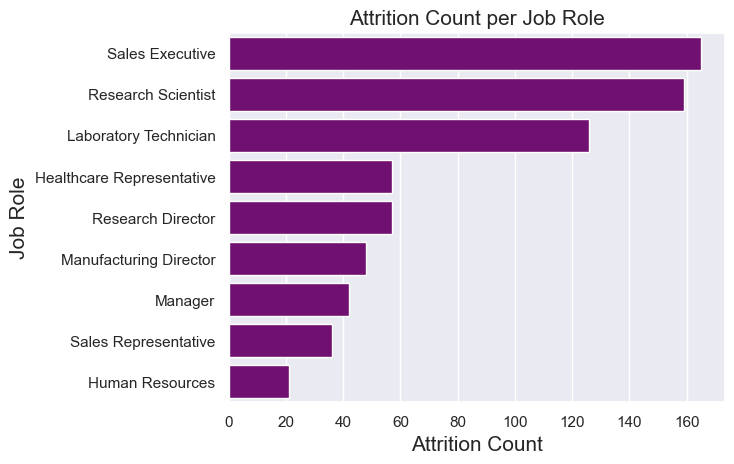

In [80]:
fig = sns.barplot(x='Attrition_Count', y=job_df.index, data=job_df,color='purple')
fig.set_title('Attrition Count per Job Role',fontsize=15)
fig.set_xlabel('Attrition Count',fontsize=15)
fig.set_ylabel('Job Role',fontsize=15)

# 6.Attrition Count based on EducationField

Text(0, 0.5, 'Education Field')

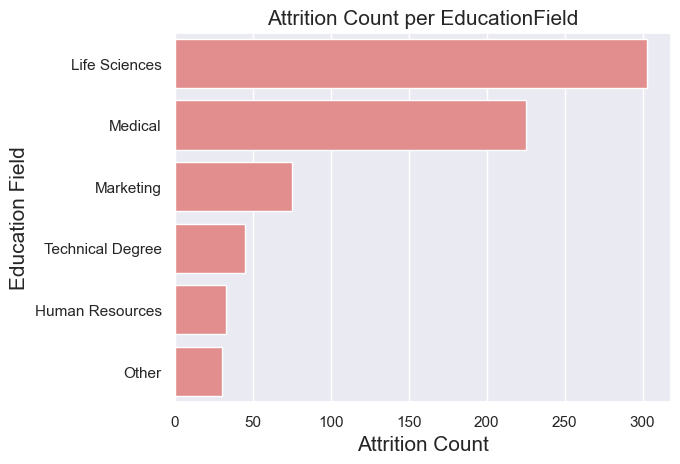

In [83]:
#Creating new Dataframe
Edu_val = df[df['Attrition']=='Yes']['EducationField'].value_counts()
Edu_df = pd.DataFrame(Edu_val)
Edu_df=Edu_df.rename(columns={'EducationField':"Attrition_Count"})


fig = sns.barplot(x='Attrition_Count', y=Edu_df.index, data=Edu_df,color='lightcoral')
fig.set_title('Attrition Count per EducationField',fontsize=15)
fig.set_xlabel('Attrition Count',fontsize=15)
fig.set_ylabel('Education Field',fontsize=15)

# 7.Attrition Based on Gender and Marital Status

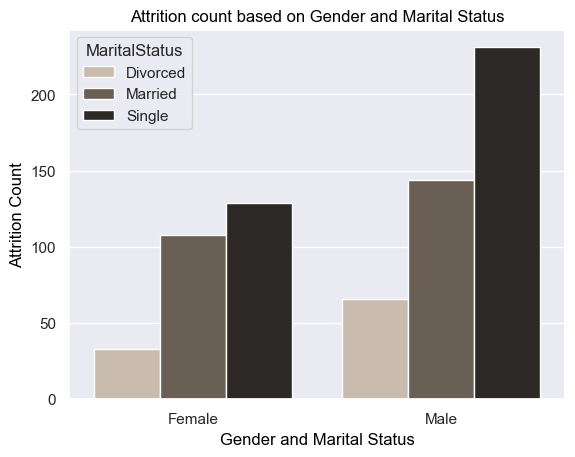

In [94]:
gen_df = df.groupby(['Gender','MaritalStatus','Attrition']).size().reset_index(name='Attrition_Count')
gen_att_df = gen_df[gen_df['Attrition']=='Yes']

#Here we using Barplot
colors = ['#cdbcaa','#6c5f51','#2d2925']
fig = sns.barplot(data = gen_att_df,x='Gender',y='Attrition_Count',hue='MaritalStatus',palette=colors)
plt.xlabel('Gender and Marital Status',color='black')
plt.ylabel("Attrition Count",color='black')
plt.title("Attrition count based on Gender and Marital Status",color='black')
plt.show()


# Exploratory Data Analysis for Numerical Columns

In [95]:
num_col

Index(['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'Holiday_taken', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## 1.Attrition Count based on Age

Text(0.5, 1.0, 'Attrition Count Based on Age')

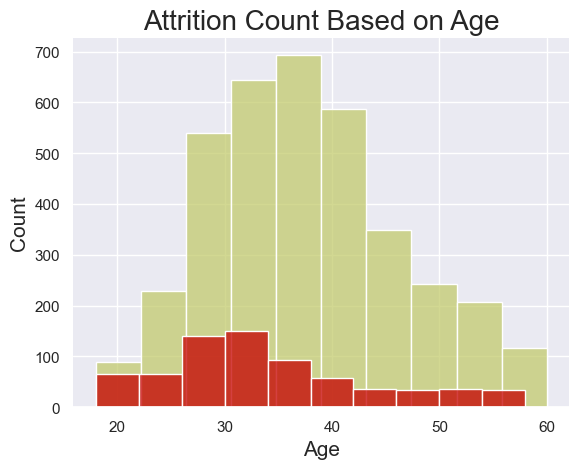

In [101]:
sns.histplot(df[df['Attrition']=='No']['Age'],label = 'Non Attrition',kde=False,bins=10,color = '#c3cb6e')
sns.histplot(df[df['Attrition']=='Yes']['Age'],label = 'Attrition',kde = False,bins = 10,color ='#c60000')
sns.despine(left=True)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title("Attrition Count Based on Age",fontsize=20)


# 2.Attrition Based on Holiday Taken

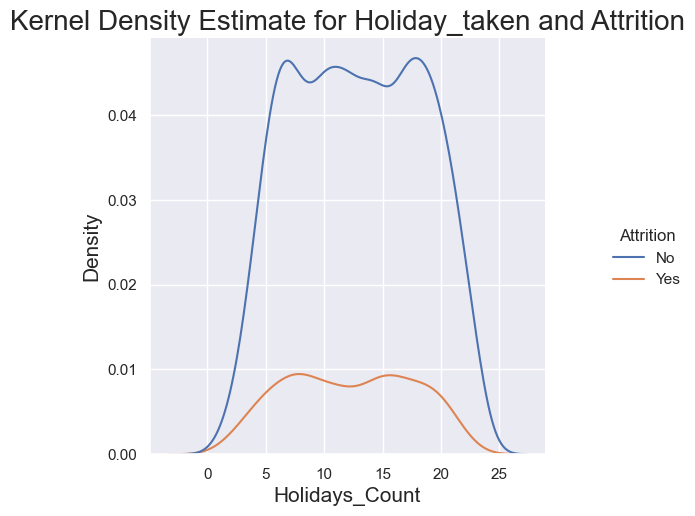

In [103]:
# Plot Kernel Density Estimate(kde) for HolidayTaken column
sns.displot(df,x='Holiday_taken',hue='Attrition',kind='kde')
plt.xlabel('Holidays_Count',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title("Kernel Density Estimate for Holiday_taken and Attrition",fontsize=20)
plt.show()

# 3.Attrition based on JobLevel

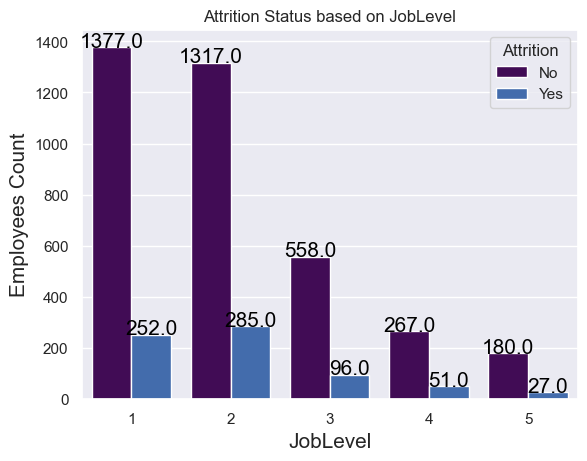

In [105]:
colors = ["#460061", "#3268bd"]
# Create the count plot
fig = sns.countplot(data=df,x=df.JobLevel,orient='h',hue=df.Attrition, palette=colors)
plt.legend(title="Attrition")
plt.title("Attrition Status based on JobLevel")
#setting the font size for labels
fig.set_ylabel('Employees Count', fontsize=15)
fig.set_xlabel('JobLevel', fontsize=15)

for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2., height+0.1, height, ha="center",fontsize=15,color='black')

# 4.Attrition based on Total Satisfaction of an employee

C:\Users\subag\AppData\Local\Temp\ipykernel_29180\30742466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp['Employee_Satisfaction']=np.round((emp['WorkLifeBalance']+emp['JobSatisfaction']+emp['EnvironmentSatisfaction'])/3)
C:\Users\subag\AppData\Local\Temp\ipykernel_29180\30742466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp.drop(columns=['WorkLifeBalance','JobSatisfaction','EnvironmentSatisfaction'],inplace=True)
C:\Users\subag\AppData\Local\Temp\ipykernel_29180\30742466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

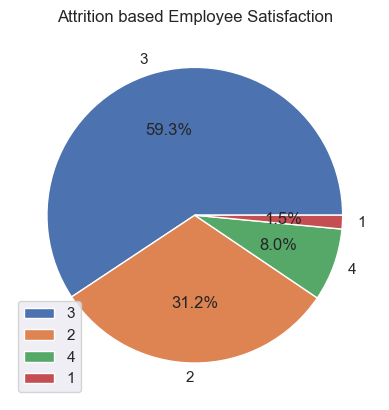

In [110]:
emp = df[['WorkLifeBalance','JobSatisfaction','EnvironmentSatisfaction','Attrition']]

emp['Employee_Satisfaction']=np.round((emp['WorkLifeBalance']+emp['JobSatisfaction']+emp['EnvironmentSatisfaction'])/3)
emp.drop(columns=['WorkLifeBalance','JobSatisfaction','EnvironmentSatisfaction'],inplace=True)
emp['Employee_Satisfaction']=emp['Employee_Satisfaction'].astype(float).astype(int)
y = emp['Employee_Satisfaction'].value_counts()
div = ['3','2','4','1']
plt.pie(y,labels=div,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Attrition based Employee Satisfaction')
plt.show()

# 5. Attrition Based on Education Level

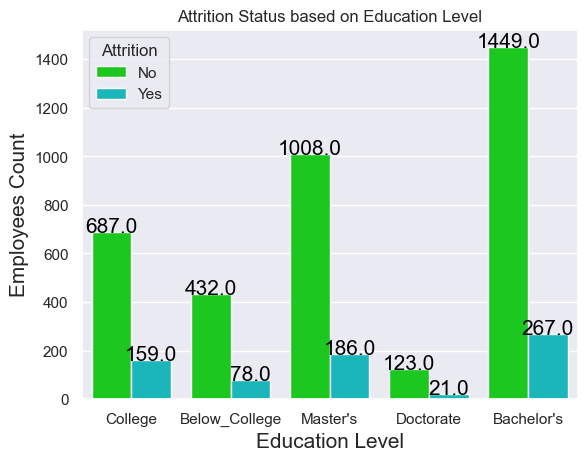

In [118]:
colors = ["#00e304", "#00cfd4"]
# Create the count plot
df2 = df.copy()
df2['Education']=df2['Education'].map({5:'Doctorate',4:"Master's",3:"Bachelor's",2:"College",1:"Below_College"})
fig = sns.countplot(data=df2,x=df2.Education,orient='v',hue=df1.Attrition, palette=colors)
plt.legend(title="Attrition")
plt.title("Attrition Status based on Education Level")
#setting the font size for labels
fig.set_ylabel('Employees Count', fontsize=15)
fig.set_xlabel('Education Level', fontsize=15)

for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2., height+0.1, height, ha="center",fontsize=15,color='black')

# Analysis From Above Graphs

1. When we analysis over time worker, attrition is little bit higher than normal standard hours worker
2. Attrition is higher in Rare travelling in business travel
3. Attrition is high in Research & Developement department
4. Attrition count is higher in Sales Executive, Research Scientist, Laboratory Technician job roles when it compared to other roles
5. Attrition count is higher in Lifescience and Medical Department
6. Attrition is much much lesser in divorce female candidates
7. Attrition is much higher in single male candidates
8. Mostly 25 to 35 age candidates leave their job
9. Attrition candidate take more than 10 to 15 days holiday
10. Attrition is mostly higher in Joblevel 1 followed by joblevel 2
11. In the Education Level the Bachelors attrition is higher than others